In [1]:
#Defendencies
import pandas as pd
from pathlib import Path
import requests
import json
import matplotlib.pyplot as plt

In [2]:
#Use Panda to read Data
crash_data = pd.read_csv("Resources/Crash_Data.csv")
crash_data.head()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


In [3]:
crash_data.shape

(48882, 35)

In [4]:
crash_data.isna().sum()

X                       139
Y                       139
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName               19
CrossStreet             304
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 45
Gender_Drv1             885
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          45
AlcoholUse_Drv1          45
DrugUse_Drv1             45
Unittype_Two           3203
Age_Drv2               4507
Gender_Drv2            4604
Traveldirection_Two    3203
Unitaction_Two         3203
Violation1_Drv2        4507
AlcoholUse_Drv2        4507
DrugUse_Drv2           4507
Latitude                139
Longitude               139
dtype: int64

In [7]:
#filter Data to specific years
specific_year=crash_data.loc[(crash_data["Year"]==2020) | (crash_data["Year"]==2021)
                            | (crash_data["Year"]==2022)]
specific_year

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
37637,-111.942400,33.422150,37638,3614716,2020/01/01 09:02:00+00,2020,Ash Ave,University Dr,80.0,Intersection Related 206,...,Driver,28.0,Male,South,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.422150,-111.942400
37638,-111.955590,33.407410,37639,3614159,2020/01/01 09:11:00+00,2020,Broadway Rd,Industrial Park Ave,-96.0,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.407410,-111.955590
37639,-111.945770,33.424320,37640,3608918,2020/01/01 09:41:00+00,2020,Wilson St,6th St,0.0,Intersection 4 Way 202,...,Driver,61.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.424320,-111.945770
37640,-111.922400,33.414770,37641,3614004,2020/01/01 11:04:00+00,2020,Apache Blvd,Terrace Rd,-600.0,Not Junction Related,...,Driver,42.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.414770,-111.922400
37641,-111.926260,33.434030,37642,3614179,2020/01/01 21:37:00+00,2020,Scottsdale Rd,Playa Del Norte Dr,0.0,Intersection T Inter 203,...,Driver,52.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.434030,-111.926260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46462,-111.933653,33.421967,46463,4016095,2022/12/31 20:35:00+00,2022,University Dr,College Ave,401.0,Not Junction Related,...,Driver,22.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653
46463,-111.939610,33.393137,46464,4017552,2022/12/31 21:55:00+00,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,...,Driver,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610
46464,-111.961130,33.378244,46465,4014475,2023/01/01 01:02:00+00,2022,Baseline Rd,Darrow Dr,0.0,Intersection 4 Way 202,...,Driver,19.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130
46465,-111.965455,33.378270,46466,4014901,2023/01/01 01:45:00+00,2022,Arizona Mills S,Baseline Rd,0.0,Intersection 4 Way 202,...,Driver,21.0,Male,South,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.378270,-111.965455


In [8]:
specific_year.count()

X                      8829
Y                      8829
OBJECTID               8830
Incidentid             8830
DateTime               8830
Year                   8830
StreetName             8830
CrossStreet            8665
Distance               8829
JunctionRelation       8829
Totalinjuries          8829
Totalfatalities        8829
Injuryseverity         8829
Collisionmanner        8829
Lightcondition         8829
Weather                8829
SurfaceCondition       8829
Unittype_One           8829
Age_Drv1               8820
Gender_Drv1            8614
Traveldirection_One    8829
Unitaction_One         8829
Violation1_Drv1        8820
AlcoholUse_Drv1        8820
DrugUse_Drv1           8820
Unittype_Two           8042
Age_Drv2               7724
Gender_Drv2            7705
Traveldirection_Two    8042
Unitaction_Two         8042
Violation1_Drv2        7724
AlcoholUse_Drv2        7724
DrugUse_Drv2           7724
Latitude               8829
Longitude              8829
dtype: int64

In [9]:
Filter_data=specific_year.dropna(how='any')

In [17]:
Filter_data.count()

X                      7400
Y                      7400
OBJECTID               7400
Incidentid             7400
DateTime               7400
Year                   7400
StreetName             7400
CrossStreet            7400
Distance               7400
JunctionRelation       7400
Totalinjuries          7400
Totalfatalities        7400
Injuryseverity         7400
Collisionmanner        7400
Lightcondition         7400
Weather                7400
SurfaceCondition       7400
Unittype_One           7400
Age_Drv1               7400
Gender_Drv1            7400
Traveldirection_One    7400
Unitaction_One         7400
Violation1_Drv1        7400
AlcoholUse_Drv1        7400
DrugUse_Drv1           7400
Unittype_Two           7400
Age_Drv2               7400
Gender_Drv2            7400
Traveldirection_Two    7400
Unitaction_Two         7400
Violation1_Drv2        7400
AlcoholUse_Drv2        7400
DrugUse_Drv2           7400
Latitude               7400
Longitude              7400
dtype: int64

In [25]:

Filter_data["Unittype_One"].unique()

array(['Driver', 'Pedestrian', 'Pedalcyclist'], dtype=object)

In [26]:

group_data= Filter_data.groupby(["Unittype_One"]).count()
filtered_data_df=group_data[["Incidentid"]]
filtered_data_df

,Incidentid
Unittype_One,
Driver,7086
Pedalcyclist,191
Pedestrian,123


In [27]:
# filtering data by crashes involved with drivers
Driver_accident=Filter_data.loc[Filter_data["Unittype_One"]== "Driver", :]
Driver_accident

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
37637,-111.942400,33.422150,37638,3614716,2020/01/01 09:02:00+00,2020,Ash Ave,University Dr,80.0,Intersection Related 206,...,Driver,28.0,Male,South,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.422150,-111.942400
37639,-111.945770,33.424320,37640,3608918,2020/01/01 09:41:00+00,2020,Wilson St,6th St,0.0,Intersection 4 Way 202,...,Driver,61.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.424320,-111.945770
37640,-111.922400,33.414770,37641,3614004,2020/01/01 11:04:00+00,2020,Apache Blvd,Terrace Rd,-600.0,Not Junction Related,...,Driver,42.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.414770,-111.922400
37641,-111.926260,33.434030,37642,3614179,2020/01/01 21:37:00+00,2020,Scottsdale Rd,Playa Del Norte Dr,0.0,Intersection T Inter 203,...,Driver,52.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.434030,-111.926260
37642,-111.890330,33.407480,37643,3614177,2020/01/01 23:45:00+00,2020,Price Rd,Broadway Rd,0.0,Intersection 4 Way 202,...,Driver,24.0,Male,Northwest,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.407480,-111.890330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46461,-111.965928,33.349081,46462,4017542,2022/12/31 15:47:00+00,2022,Elliot Rd,Harl Ave,0.0,Intersection 4 Way 202,...,Driver,50.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349081,-111.965928
46462,-111.933653,33.421967,46463,4016095,2022/12/31 20:35:00+00,2022,University Dr,College Ave,401.0,Not Junction Related,...,Driver,22.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653
46463,-111.939610,33.393137,46464,4017552,2022/12/31 21:55:00+00,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,...,Driver,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610
46464,-111.961130,33.378244,46465,4014475,2023/01/01 01:02:00+00,2022,Baseline Rd,Darrow Dr,0.0,Intersection 4 Way 202,...,Driver,19.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130


In [28]:
Driver_accident["AlcoholUse_Drv2"].unique()

array(['No Apparent Influence', 'Alcohol'], dtype=object)

In [35]:
cause_accident=Driver_accident.loc[(Driver_accident["AlcoholUse_Drv2"]== "Alcohol")
                                   ]
specific_coloumn=cause_accident[["Incidentid",
                                "AlcoholUse_Drv2", "Gender_Drv2"
                                ]]
specific_coloumn

,Incidentid,AlcoholUse_Drv2,Gender_Drv2
37908,3629760,Alcohol,Male
38807,3666774,Alcohol,Male
38843,3667268,Alcohol,Male
39302,3688872,Alcohol,Male
39518,3703041,Alcohol,Male
39699,3716882,Alcohol,Female
40894,3778434,Alcohol,Male
41482,3927486,Alcohol,Male
41999,3837376,Alcohol,Male
42258,3849084,Alcohol,Male


In [36]:
alcohol_accident=specific_coloumn.groupby("Gender_Drv2").count()
alcohol_accident

,Incidentid,AlcoholUse_Drv2
Gender_Drv2,,
Female,10,10
Male,18,18


<Axes: xlabel='Gender', ylabel='Number of Incident'>

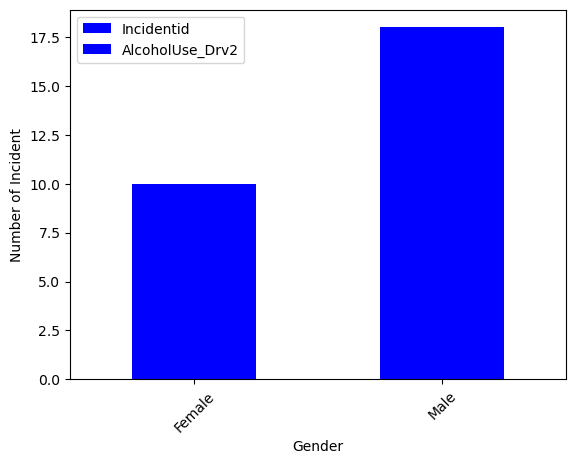

In [39]:
# Is there a correlation between sex and alcohol use that cause automobile accidents in City of Tempe during the year 2020-2022?
# 
Figure1=alcohol_accident.plot(kind="bar", facecolor="b", xlabel="Gender", ylabel="Number of Incident")
xticklabels=("Female", "Male")
Figure1.set_xticklabels(xticklabels, rotation=45)
Figure1

In [ ]:
Driver_accident=Filter_data.loc[Filter_data["Unittype_One"]== "Driver", :]

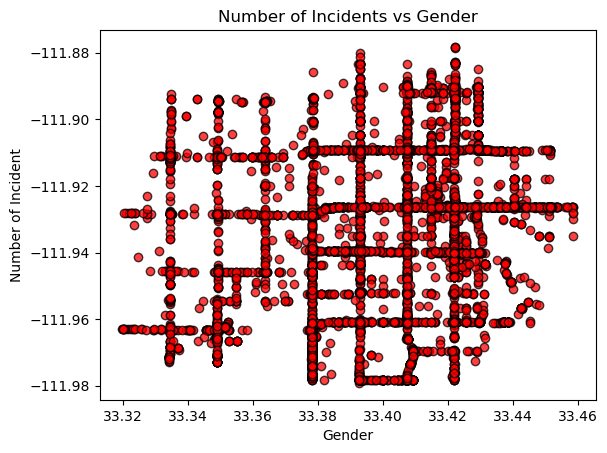

In [48]:
x_axis = Driver_accident["Latitude"]
y_axis = Driver_accident["Longitude"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
#plt.ylim(0, 1)
#plt.xlim(0, x_limit)
plt.title("Number of Incidents vs Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Incident")
plt.show()
#plt.savefig("../Images/IceCreamSales.png")
plt.show()